In [2]:
import boto3
import csv
import re
import os
region='us-east-1'
with open("shar_accessKeys.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        accesskey=line[0]
        secretkey=line[1]
photo='dataset/korf1.jpg'
client=boto3.client('rekognition',aws_access_key_id=accesskey,aws_secret_access_key=secretkey,region_name=region)
#client=boto3.client('rekognition')
with open(photo, "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            print(val1)



99.93868255615234


In [2]:
from PIL import Image, ImageEnhance


im = Image.open(photo)

enhancer = ImageEnhance.Brightness(im)
dict={}
numbers=[0.0,0.5,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0]
for x in numbers:
    im_output = enhancer.enhance(x)
    im_output.save('darkened-image.png')
    with open('darkened-image.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            dict[x]=val1;

print(dict)
    



{0.5: 95.77424621582031, 1.0: 95.48723602294922, 1.5: 91.88813781738281, 2.0: 87.85436248779297, 3.0: 86.55126953125, 4.0: 71.42266845703125, 5.0: 70.23995971679688, 6.0: 87.64368438720703, 7.0: 58.67530822753906}


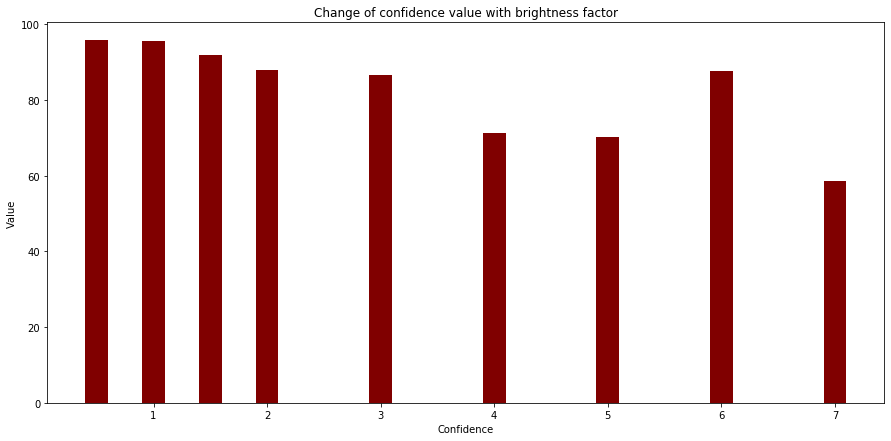

In [3]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
fig = plt.figure(figsize = (15, 7))
l1=[]
l2=[]
for key,value in dict.items():
    l1.append(key)
    l2.append(value)
plt.bar(l1, l2, color ='maroon',  
        width = 0.2) 
plt.xlabel("Confidence") 
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
plt.show()

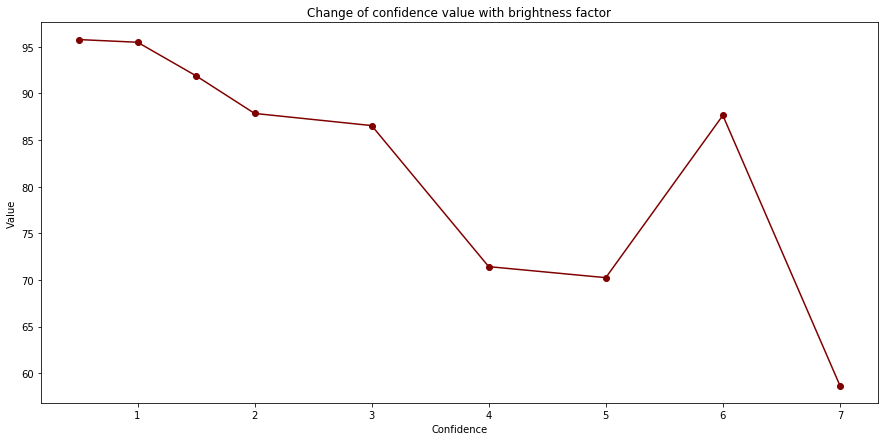

In [4]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
fig = plt.figure(figsize = (15, 7))
l1=[]
l2=[]
for key,value in dict.items():
    l1.append(key)
    l2.append(value)
plt.plot(l1, l2, color ='maroon',marker='o')
plt.xlabel("Brightness factor") 
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
plt.show()

In [3]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
listof=[]
for en in os.listdir(basepath):
    for e in os.listdir(os.path.join(basepath,en)):
        x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)

        enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers=[0.0,0.5,1.0,1.5,2.0,3.0,4.0,5.0,7.0,9.0,11.0]
        for x in numbers:
            im_output = enhancer.enhance(x)
            im_output.save('darkened-image.png')
            with open('darkened-image.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            dict[x]=val1;
        listof.append(dict)
    
print(listof)




[{0.5: 67.6649169921875, 1.0: 79.01007843017578, 1.5: 60.822265625, 2.0: 71.42630767822266, 3.0: 50.26994323730469, 7.0: 71.40354919433594}, {0.5: 95.83922576904297, 1.0: 88.59627532958984, 1.5: 74.21913146972656, 2.0: 65.36763000488281, 3.0: 84.7997817993164, 4.0: 91.6873779296875, 5.0: 89.04235076904297, 7.0: 87.35929870605469, 9.0: 83.59629821777344, 11.0: 52.713130950927734}, {0.5: 93.8592758178711, 1.0: 95.48723602294922, 1.5: 93.4970703125, 2.0: 87.85436248779297, 3.0: 86.55126953125, 4.0: 71.42266845703125, 5.0: 70.23995971679688, 7.0: 58.67530822753906, 9.0: 53.19194793701172, 11.0: 80.79085540771484}, {0.5: 93.2171859741211, 1.0: 94.1226806640625, 1.5: 92.7547378540039, 2.0: 88.65876770019531, 3.0: 89.83843994140625, 4.0: 62.691402435302734, 5.0: 69.51018524169922, 7.0: 89.88240051269531, 9.0: 54.16953659057617}, {0.5: 99.3316650390625, 1.0: 99.50020599365234, 1.5: 99.4266357421875, 2.0: 99.49700927734375, 3.0: 98.8099365234375, 4.0: 98.39663696289062, 5.0: 98.06483459472656, 

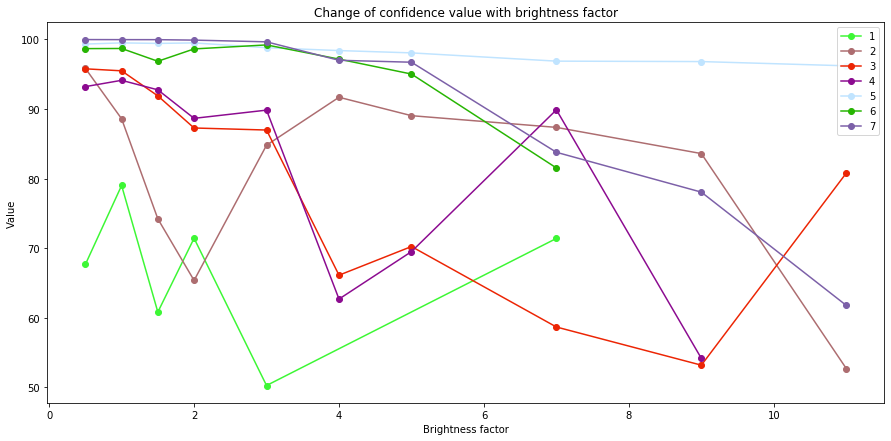

In [3]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in listof:
    l1=[]
    l2=[]
    i=i+1
    for key,val in d.items():
        l1.append(key)
        l2.append(val)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")       
plt.show()

In [1]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
listof=[]
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)

        enhancer = ImageEnhance.Sharpness(im)
        dict={}
        numbers=[0,0.5,1,1.5,100,11,110,120,130,15,2,20,25,30,35,4,40,45,50,60,7,70,80,9]
        for x in numbers:
            im_output = enhancer.enhance(x)
            im_output.save('darkened-image.png')
            with open('darkened-image.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            dict[x]=val1;
        listof.append(dict)
    
print(listof)




NameError: name 'os' is not defined

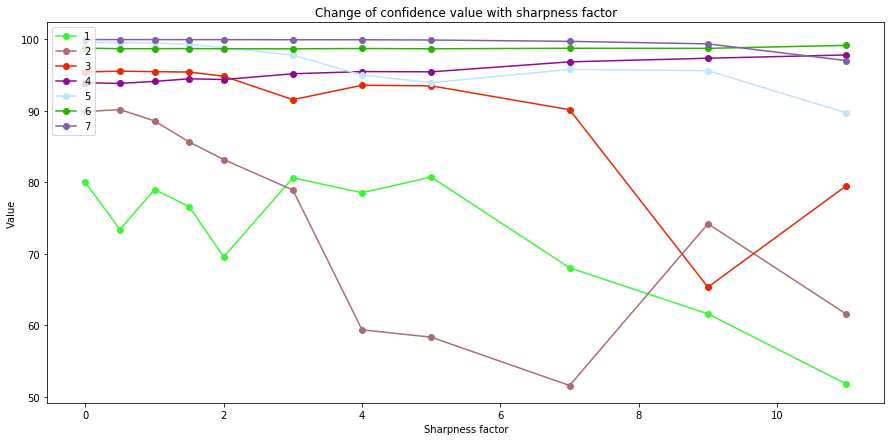

In [5]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in listof:
    l1=[]
    l2=[]
    i=i+1
    for key,val in d.items():
        l1.append(key)
        l2.append(val)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper left")    
plt.show()

In [3]:
basepath = 'C:/Users/sshar/testingbias/dataset/'
listof=[]
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)

        enhancer = ImageEnhance.Contrast(im)
        dict={}
        numbers=[0.0,0.5,1.0,1.5,100,11.0,110,130,15.0,150,170,2.0,20.0,200,25,250,30,35,350,4,40,45,450,50,60,600,7,70,80,800,9]
        for x in numbers:
            im_output = enhancer.enhance(x)
            im_output.save('darkened-image.png')
            with open('darkened-image.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            dict[x]=val1;
        listof.append(dict)
    
print(listof)



[{0.5: 94.40454864501953, 1.0: 95.48723602294922, 1.5: 96.44929504394531, 100: 90.62784576416016, 11.0: 71.50363159179688, 110: 87.55268096923828, 130: 90.383056640625, 15.0: 61.986778259277344, 150: 93.57972717285156, 170: 91.00985717773438, 2.0: 95.61441802978516, 20.0: 73.39228057861328, 200: 91.00985717773438, 25: 88.60548400878906, 250: 91.00985717773438, 30: 87.56130981445312, 35: 91.04045104980469, 350: 91.00985717773438, 4: 92.0904541015625, 40: 80.45819091796875, 45: 90.30915832519531, 450: 91.00985717773438, 50: 91.97171020507812, 60: 91.96125030517578, 600: 91.00985717773438, 7: 71.46237182617188, 70: 91.19622039794922, 80: 91.22441101074219, 800: 91.00985717773438, 9: 68.7613525390625}, {0.5: 98.07539367675781, 1.0: 79.01007843017578, 1.5: 97.86468505859375, 100: 54.3690185546875, 11.0: 70.88117980957031, 110: 85.46977996826172, 130: 69.59540557861328, 15.0: 83.57120513916016, 150: 82.370361328125, 170: 55.73543167114258, 2.0: 99.60386657714844, 20.0: 67.16148376464844, 200

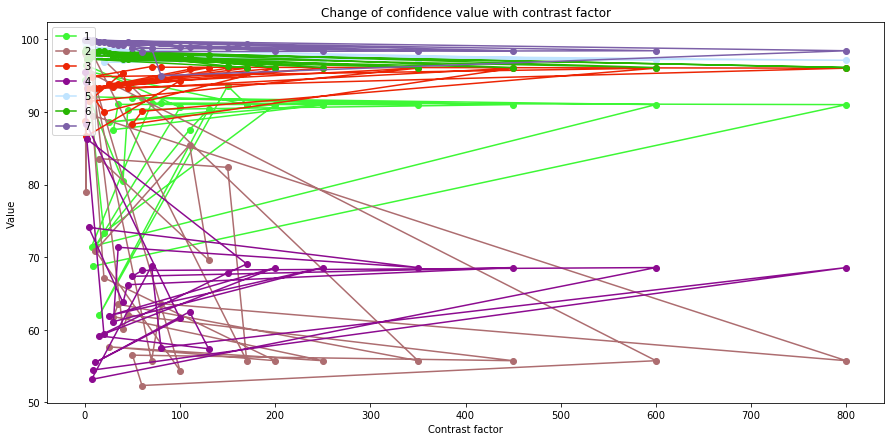

In [4]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listof:
    l1=[]
    l2=[]
    i=i+1
    for key,val in d.items():
        l1.append(key)
        l2.append(val)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
    
plt.legend(loc="upper left")        
plt.show()

In [ ]:
from PIL import Image, ImageEnhance


im = Image.open(/dataset/yaya.jpg)

enhancer = ImageEnhance.Brightness(im)
dict={}
numbers=[0.0,0.5,1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0]
for x in numbers:
    im_output = enhancer.enhance(x)
    im_output.save('darkened-image.png')
    with open('darkened-image.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            dict[x]=val1;

print(dict)
    


In [13]:
from PIL import Image

im1 = Image.open('dataset/yaya.jpg')
im2 = Image.open('dataset/yaya.jpg')
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (300, 150))
    im1.thumbnail((150,150))
    im2.thumbnail((150,150))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (130, 0))
    return dst

get_concat_h(im1, im2).save('dataset/3.jpg')


In [19]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbiasn/dataset/yaya1'
listof=[]
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)

        enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers=[0.0,0.5,1.0,1.5,2.0,4.0,7.0,9.0,11.0,15.0,20.0]
        i=0
        for x in numbers:
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('yaya'+str(x)+'.jpg')
            with open('yaya'+str(x)+'.jpg', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            dict[x]=val1;
        listof.append(dict)
    
print(listof)


[{0.5: 99.96941375732422, 1.0: 99.9688949584961, 1.5: 99.9659194946289, 2.0: 99.90513610839844, 3.0: 99.68766021728516, 4.0: 97.39936828613281, 5.0: 94.73771667480469, 7.0: 83.14903259277344, 9.0: 78.68844604492188, 11.0: 51.509666442871094}]


In [2]:
import boto3
import csv
import re
import os
region='us-east-1'
with open("rekognition.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        accesskey=line[2]
        secretkey=line[3]
photo='dataset/coarse_tilt_aligned_face.2282.11597935265_29bcdfa4a5_o.jpg'
client=boto3.client('rekognition',aws_access_key_id=accesskey,aws_secret_access_key=secretkey,region_name=region)
#client=boto3.client('rekognition')
with open(photo, "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Confidence':
                                    print(val)

99.99991607666016
100.0


In [41]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/yaya1'
listof=[]
for en in os.listdir(basepath):
    x = re.search("yaya.jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)

        enhancer = ImageEnhance.Sharpness(im)
        dict={}
        numbers=[500]
        for x in numbers:
            im_output = enhancer.enhance(x)
            im_output.save('dataset/yaya1/yaya'+str(x)+'sharp.jpg')
            with open('dataset/yaya1/yaya'+str(x)+'sharp.jpg', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Confidence':
                                    dict[x]=val1;
        listof.append(dict)
    
print(listof)

[{500: 96.57647705078125}]


In [7]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
listof=[]
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        en = en[:-4]
        enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers=[45,50]
        i=0
        for x in numbers:
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/'+en+'/'+en+'b'+str(x)+'.jpg')

In [8]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
listof=[]
for en in os.listdir(basepath):
    x = re.search("boy1.jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        en = en[:-4]
        enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers=[0.0,0.5,1.0,1.5,2.0,4.0,7.0,9.0,11.0,15.0,20.0,25,30,35,40,45,50]
        i=0
        for x in numbers:
            im_output = enhancer.enhance(x)
            im_output.save('dataset/boy1/boy1b'+str(x)+'.jpg')

In [11]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
listof=[]
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        en = en[:-4]
        enhancer = ImageEnhance.Sharpness(im)
        dict={}
        numbers=[110,120,130]
        i=0
        for x in numbers:
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/'+en+'/'+en+'s'+str(x)+'.jpg')

In [11]:
from PIL import Image, ImageEnhance
photo='dataset/adience1/adience1brightness/adience1b0.0.jpg'
client=boto3.client('rekognition',aws_access_key_id=accesskey,aws_secret_access_key=secretkey,region_name=region)
#client=boto3.client('rekognition')
enhancer = ImageEnhance.Brightness(im)
im_output = enhancer.enhance(100)
im_output.save('dataset/1.jpg')
with open('dataset/1.jpg', "rb") as source_image:
                
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                print(response)
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                    for key1,val1 in val.items():
                                        if key1=='Confidence':
                                            print(val1)

{'FaceDetails': [], 'ResponseMetadata': {'RequestId': '6d4ccb46-cd69-4f66-ac13-f840b76fe949', 'HTTPStatusCode': 200, 'HTTPHeaders': {'content-type': 'application/x-amz-json-1.1', 'date': 'Tue, 27 Oct 2020 19:02:01 GMT', 'x-amzn-requestid': '6d4ccb46-cd69-4f66-ac13-f840b76fe949', 'content-length': '18', 'connection': 'keep-alive'}, 'RetryAttempts': 0}}


In [20]:
from PIL import Image, ImageEnhance
image='dataset/adience1/adience1brightness/adience1b1.0.jpg'
import csv
genlist=[]
#client=boto3.client('rekognition')
im=Image.open(image)
with open("gender.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist)
i=-1
with open(image,"rb")as source_image:
    image=source_image.read()
    response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
    for key,value in response.items():
        if key=='FaceDetails':
            for k in value:
                for ke,val in k.items():
                    if ke=='Gender':
                        for key1,val1 in val.items():
                            if key1=="Value":
                                if(val1==genlist[0]):
                                    list1.append(0)
                                else:
                                    list1.append(1)
                        

['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male']
Female


In [ ]:
from PIL import Image, ImageEnhance
from collections import OrderedDict
import csv
genlist=[]
basepath = 'C:/Users/sshar/googlevision/dataset/'
listof=[]
numbers=[0.0,0.5,1.0,1.5,11.0,15.0,2.0,20.0,25.0,30.0,35.0,4.0,40,45,50,7.0,9.0]
j=-1
dict={}
with open("gender.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist[0])

for en in os.listdir(basepath):
    j=j+1
    for e in os.listdir(os.path.join(basepath,en)):
        i=-1
        
        x=os.path.join(basepath,en)
        if os.path.isdir(os.path.join(x,e)):
            a=os.path.join(x,e)
            b=re.search("brightness",a)
            dict={}
            if(b):
                for c in os.listdir(a):
                    d=os.path.join(a,c)
                    with open(d, "rb") as source_image:
                        i=i+1
                        image=source_image.read()
                        response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                        for key,value in response.items():
                            if key=='FaceDetails':
                                for k in value:
                                    for ke,val in k.items():
                                        if ke=='Gender':
                                            for key1,val1 in val.items():
                                                if key1=='Value':
                                                    if val1==genlist[0]:
                                                        dict[numbers[i]]=0
                                                    else:
                                                        dict[numbers[i]]=1
                                                print(val1)
                    
                dictionary_items = dict.items()



                sorted_items = sorted(dictionary_items)
                
                listof.append(sorted_items)
                    

In [28]:
print(listof)

[[(0.5, 1), (1.0, 1), (1.5, 1), (2.0, 1), (4.0, 1), (7.0, 1), (9.0, 1), (11.0, 1)], [(0.5, 0), (1.0, 1), (1.5, 1), (2.0, 1)], [(0.5, 1), (1.0, 1), (1.5, 1), (2.0, 0), (4.0, 0), (7.0, 0), (9.0, 0), (11.0, 0)], [(0.5, 0), (1.0, 0), (1.5, 0), (2.0, 0), (4.0, 1), (7.0, 1), (9.0, 1)], [(0.5, 0), (1.0, 0), (1.5, 0), (2.0, 0), (4.0, 0), (7.0, 0), (9.0, 0), (11.0, 0), (15.0, 0), (20.0, 0), (25.0, 0), (30.0, 0), (35.0, 0), (40, 0), (45, 0), (50, 0)], [(0.5, 0), (1.0, 0), (1.5, 0), (2.0, 0), (4.0, 0), (7.0, 0), (9.0, 0)], [(0.5, 0), (1.0, 0), (1.5, 0), (2.0, 0), (4.0, 0), (7.0, 0), (9.0, 0), (11.0, 0), (15.0, 1), (20.0, 1)]]


In [6]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/googlevision/dataset/'
import csv
listof=[]
genlist=[]
with open("gender.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist[0])
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        i=-1
        enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers=[0.0,0.025,0.05,0.25,0.5,1.0,2.0,3.0,4.0,5.0,7.0,9.0,11.0,15.0,20.0,25.0,30.0,35.0,40,50,60]
        for x in numbers:
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change.png')
            with open('dataset/change.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                            for key1,val1 in val.items():
                                                if key1=='Value':
                                                    if val1==genlist[0]:
                                                        dict[numbers[i]]=0
                                                    else:
                                                        dict[numbers[i]]=1
                                                
        listof.append(dict)




Male


In [7]:
print(listof)

[{0.05: 1, 0.25: 1, 0.5: 1, 1.0: 1, 2.0: 1, 3.0: 1, 4.0: 1, 5.0: 1, 7.0: 1, 9.0: 1, 11.0: 1}, {0.025: 1, 0.05: 1, 0.25: 0, 0.5: 0, 1.0: 1, 2.0: 0, 3.0: 1, 7.0: 0}, {0.025: 1, 0.05: 1, 0.25: 1, 0.5: 1, 1.0: 1, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 7.0: 0, 9.0: 0, 11.0: 1}, {0.025: 1, 0.05: 1, 0.25: 0, 0.5: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 1, 5.0: 1, 7.0: 1, 9.0: 1}, {0.025: 1, 0.05: 0, 0.25: 0, 0.5: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 7.0: 0, 9.0: 0, 11.0: 0, 15.0: 0, 20.0: 0, 25.0: 0, 30.0: 0, 35.0: 0, 40: 0, 50: 0, 60: 0}, {0.025: 1, 0.05: 0, 0.25: 0, 0.5: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 7.0: 0}, {0.025: 1, 0.05: 1, 0.25: 0, 0.5: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 7.0: 0, 9.0: 0, 11.0: 0, 15.0: 1, 20.0: 1, 25.0: 1}]


In [4]:
#2 NOV
#
#
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listfb=[]
listmb=[]
listof=[]
y=-1
cor=-1
j=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist)
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        j=j+1
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        i=-1
        listof.append(en)
        enhancer = ImageEnhance.Brightness(im)
        dict={}
        print(genlist[j])
        numbers=[0.01,0.02,0.05,0.07,0.1,0.5,0.7,1.0,3.0,5.0,7.0,9.0,20.0,30.0]
        for x in numbers:
            l1=[]
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change.png')
            with open('dataset/change.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                            for key1,val1 in val.items():
                                                if key1=='Value':
                                                    if val1==genlist[j]:
                                                        
                                                        l1.append('0')
                                                    else:
                                                        
                                                        l1.append('1')
                                                else:
                                                    l1.append(val1)
                                                    dict[numbers[i]]=l1
                
        if genlist[j]=='Female':
            listfb.append(dict)
        else:
            listmb.append(dict)
        listof.append(dict)


['Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male


In [21]:
for one in listfb:
    print(one)

{0.02: ['0', 70.51692199707031], 0.05: ['0', 97.21574401855469], 0.07: ['0', 97.93964385986328], 0.1: ['0', 99.7153549194336], 0.5: ['0', 99.23445129394531], 0.7: ['0', 99.31336212158203], 1.0: ['0', 99.31173706054688], 3.0: ['0', 97.7356948852539], 5.0: ['0', 95.43597412109375], 7.0: ['0', 94.33597564697266], 9.0: ['0', 94.35319519042969]}
{0.02: ['0', 64.97480010986328], 0.05: ['0', 94.19558715820312], 0.07: ['0', 96.88496398925781], 0.1: ['0', 99.05518341064453], 0.5: ['0', 99.56611633300781], 0.7: ['0', 99.61055755615234], 1.0: ['0', 99.67023468017578], 3.0: ['0', 90.48948669433594], 5.0: ['0', 70.98439025878906], 7.0: ['0', 79.58060455322266], 9.0: ['0', 86.01748657226562]}
{0.02: ['0', 59.64750671386719], 0.05: ['0', 97.94694519042969], 0.07: ['0', 97.25288391113281], 0.1: ['0', 98.48190307617188], 0.5: ['0', 96.80535125732422], 0.7: ['0', 97.32659149169922], 1.0: ['0', 97.29955291748047], 3.0: ['0', 93.49687957763672], 5.0: ['0', 70.77242279052734], 7.0: ['0', 75.2270278930664],

In [22]:
from collections.abc import Mapping

name=""
for each in listfb:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]
    

In [23]:
for one in listfb:
    print(one)

{0.02: ['0', 70.51692199707031], 0.05: ['0', 97.21574401855469], 0.07: ['0', 97.93964385986328], 0.1: ['0', 99.7153549194336], 0.5: ['0', 99.23445129394531], 0.7: ['0', 99.31336212158203], 1.0: ['0', 99.31173706054688], 3.0: ['0', 97.7356948852539], 5.0: ['0', 95.43597412109375], 7.0: ['0', 94.33597564697266], 9.0: ['0', 94.35319519042969]}
{0.02: ['0', 64.97480010986328], 0.05: ['0', 94.19558715820312], 0.07: ['0', 96.88496398925781], 0.1: ['0', 99.05518341064453], 0.5: ['0', 99.56611633300781], 0.7: ['0', 99.61055755615234], 1.0: ['0', 99.67023468017578], 3.0: ['0', 90.48948669433594], 5.0: ['0', 70.98439025878906], 7.0: ['0', 79.58060455322266], 9.0: ['0', 86.01748657226562]}
{0.02: ['0', 59.64750671386719], 0.05: ['0', 97.94694519042969], 0.07: ['0', 97.25288391113281], 0.1: ['0', 98.48190307617188], 0.5: ['0', 96.80535125732422], 0.7: ['0', 97.32659149169922], 1.0: ['0', 97.29955291748047], 3.0: ['0', 93.49687957763672], 5.0: ['0', 70.77242279052734], 7.0: ['0', 75.2270278930664],

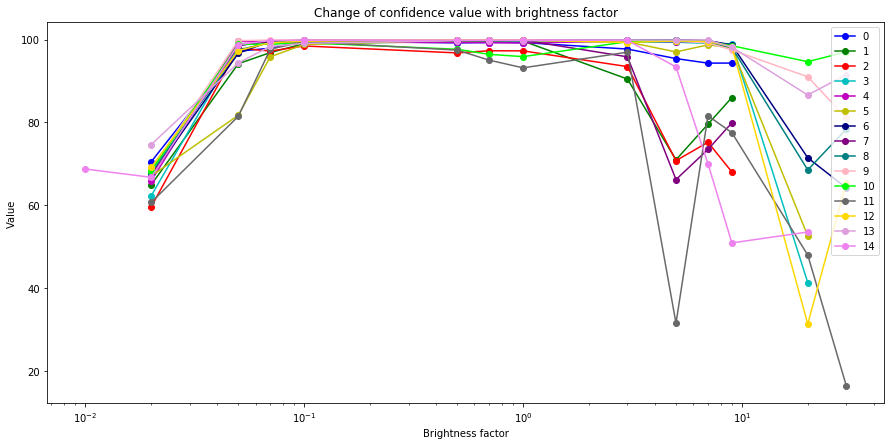

In [24]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in listfb:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [25]:
from collections.abc import Mapping

name=""
for each in listmb:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]
    

In [26]:
for one in listmb:
    print(one)

{0.05: ['1', 8.023399353027344], 0.07: ['1', 5.786033630371094], 0.1: ['1', 12.057357788085938], 0.5: ['1', 7.8515472412109375, '1', 93.8592758178711], 0.7: ['1', 4.409187316894531], 1.0: ['1', 6.811286926269531, '1', 95.48723602294922], 3.0: ['1', 13.020156860351562], 5.0: ['1', 29.760040283203125], 7.0: ['1', 41.32469177246094], 9.0: ['1', 46.80805206298828]}
{0.02: ['1', 29.247909545898438], 0.05: ['1', 22.6993408203125], 0.07: ['0', 87.21846008300781], 0.1: ['0', 90.1729507446289], 0.5: ['0', 67.6649169921875], 0.7: ['1', 42.218048095703125], 1.0: ['1', 20.98992156982422], 3.0: ['1', 49.73005676269531], 7.0: ['0', 71.40354919433594]}
{0.05: ['1', 28.165573120117188], 0.07: ['1', 21.274330139160156], 0.1: ['1', 16.55548858642578], 0.5: ['1', 5.763542175292969], 0.7: ['1', 6.852424621582031], 1.0: ['1', 11.054763793945312], 3.0: ['0', 85.27903747558594], 5.0: ['0', 92.73217010498047], 7.0: ['0', 89.73543548583984], 9.0: ['0', 92.04299926757812]}
{0.02: ['1', 32.21638488769531], 0.05:

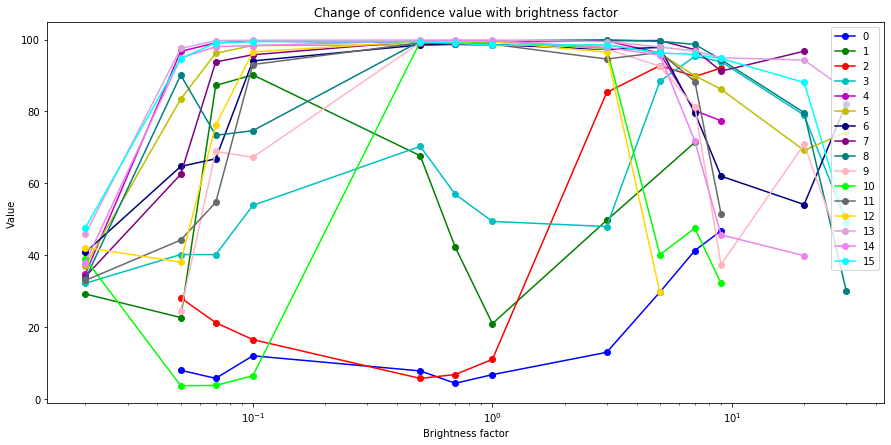

In [27]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in listmb:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [27]:
from collections.abc import Mapping
l3=[]
flag=0
category1=[]
category2=[]
category3=[]
name=""
for each in listof:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            for v in vall:
                if v=='1':
                    if flag==0:
                        flag=2
                    if flag==2:
                        flag=2;
                    else:
                        flag=3
                if v=='0':
                    if flag==0:
                        flag=1
                    if flag==1:
                        flag=1
                    else:
                        flag=3

        if flag==1:
            category1.append(name)
            category1.append(each)
        if flag==2:
            category2.append(name)
            category2.append(each)
        if flag==3:
            category3.append(name)
            category3.append(each)
    else:
        name=each
print("\nCategory1:")    
print(category1)
print("\nCategory2:")    
print(category2)
print("\nCategory3:")    
print(category3)



Category1:
['kenyafemale.jpg', {0.02: ['0', 66.9731674194336], 0.05: ['0', 99.36978149414062], 0.07: ['0', 99.87869262695312], 0.1: ['0', 99.94896697998047], 0.5: ['0', 99.9831771850586], 0.7: ['0', 99.98881530761719], 1.0: ['0', 99.98619842529297], 3.0: ['0', 99.92159271240234], 5.0: ['0', 97.07982635498047], 7.0: ['0', 97.77600860595703]}, 'koreanf.jpg', {0.01: ['0', 70.56883239746094], 0.02: ['0', 66.88712310791016], 0.05: ['0', 98.70088195800781], 0.07: ['0', 99.20216369628906], 0.1: ['0', 96.72906494140625], 0.5: ['0', 96.51296997070312], 0.7: ['0', 97.32557678222656], 1.0: ['0', 97.33777618408203], 3.0: ['0', 99.32838439941406], 5.0: ['0', 98.99453735351562], 7.0: ['0', 97.69542694091797], 9.0: ['0', 96.84285736083984], 20.0: ['0', 92.14749908447266], 30.0: ['0', 77.3870849609375]}, 'pv.jpg', {0.02: ['0', 64.82209777832031], 0.05: ['0', 87.32269287109375], 0.07: ['0', 98.29808807373047], 0.1: ['0', 92.26351928710938], 0.5: ['0', 97.4356689453125], 0.7: ['0', 96.760009765625], 1.

In [261]:
from collections.abc import Mapping
cat1dict={}
list1=[]
ll1=[]
for cat1 in category1:
    if isinstance(cat1, Mapping):
        cat1dict={}
        for keycat1,valcat1 in cat1.items():
            for vals in valcat1:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat1dict[keycat1]=vals
        list1.append(cat1dict)
print(list1)

[{0.02: 66.9731674194336, 0.05: 99.36978149414062, 0.07: 99.87869262695312, 0.1: 99.94896697998047, 0.5: 99.9831771850586, 0.7: 99.98881530761719, 1.0: 99.98619842529297, 3.0: 99.92159271240234, 5.0: 97.07982635498047, 7.0: 97.77600860595703}, {0.01: 70.56883239746094, 0.02: 66.88712310791016, 0.05: 98.70088195800781, 0.07: 99.20216369628906, 0.1: 96.72906494140625, 0.5: 96.51296997070312, 0.7: 97.32557678222656, 1.0: 97.33777618408203, 3.0: 99.32838439941406, 5.0: 98.99453735351562, 7.0: 97.69542694091797, 9.0: 96.84285736083984, 20.0: 92.14749908447266, 30.0: 77.3870849609375}, {0.02: 64.82209777832031, 0.05: 87.32269287109375, 0.07: 98.29808807373047, 0.1: 92.26351928710938, 0.5: 97.4356689453125, 0.7: 96.760009765625, 1.0: 96.30369567871094, 3.0: 71.29768371582031, 5.0: 81.47154235839844}]


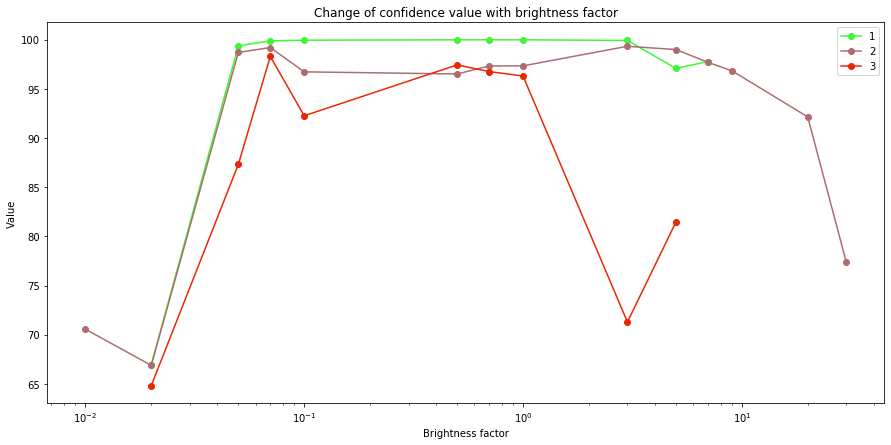

In [262]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list1:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")    
plt.xscale("log")
plt.show()

In [263]:
cat2dict={}
list2=[]
ll1=[]
for cat2 in category2:
    if isinstance(cat2, Mapping):
        cat2dict={}
        for keycat2,valcat2 in cat2.items():
            for vals in valcat2:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat2dict[keycat2]=vals
        list2.append(cat2dict)
print(list2)

[{0.05: 91.97660064697266, 0.07: 97.23590850830078, 0.1: 87.94264221191406, 0.5: 93.8592758178711, 0.7: 92.11467742919922, 1.0: 95.48723602294922, 3.0: 86.97984313964844, 5.0: 70.23995971679688, 7.0: 58.67530822753906, 9.0: 53.19194793701172}]


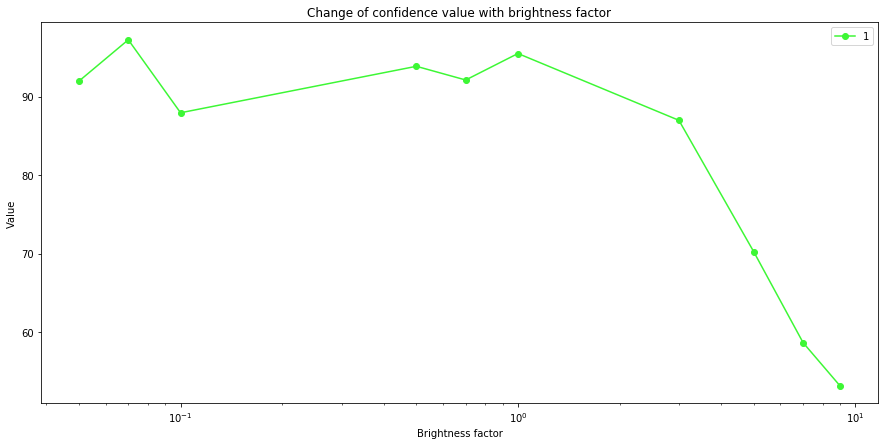

In [264]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list2:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")    
plt.xscale("log")
plt.show()

In [265]:
cat3dict={}
list3=[]
ll1=[]
for cat3 in category3:
    if isinstance(cat3, Mapping):
        list3.append(cat3)
print(list3)

[{0.02: ['0', 75.3424301147461], 0.05: ['0', 99.38933563232422], 0.07: ['0', 99.66726684570312], 0.1: ['0', 99.84510040283203], 0.5: ['0', 99.96531677246094], 0.7: ['0', 99.97644805908203], 1.0: ['0', 99.97807312011719], 3.0: ['0', 99.50231170654297], 5.0: ['0', 93.36849212646484], 7.0: ['0', 89.5778579711914], 9.0: ['0', 63.097774505615234], 20.0: ['1', 66.01045227050781], 30.0: ['1', 53.50140380859375]}, {0.02: ['1', 70.75209045410156], 0.05: ['1', 77.3006591796875], 0.07: ['0', 87.21846008300781], 0.1: ['0', 90.1729507446289], 0.5: ['0', 67.6649169921875], 0.7: ['1', 57.781951904296875], 1.0: ['1', 79.01007843017578], 3.0: ['1', 50.26994323730469], 7.0: ['0', 71.40354919433594]}, {0.05: ['1', 71.83442687988281], 0.07: ['1', 78.72566986083984], 0.1: ['1', 83.44451141357422], 0.5: ['1', 94.23645782470703], 0.7: ['1', 93.14757537841797], 1.0: ['1', 88.94523620605469], 3.0: ['0', 85.27903747558594], 5.0: ['0', 92.73217010498047], 7.0: ['0', 89.73543548583984], 9.0: ['0', 92.042999267578

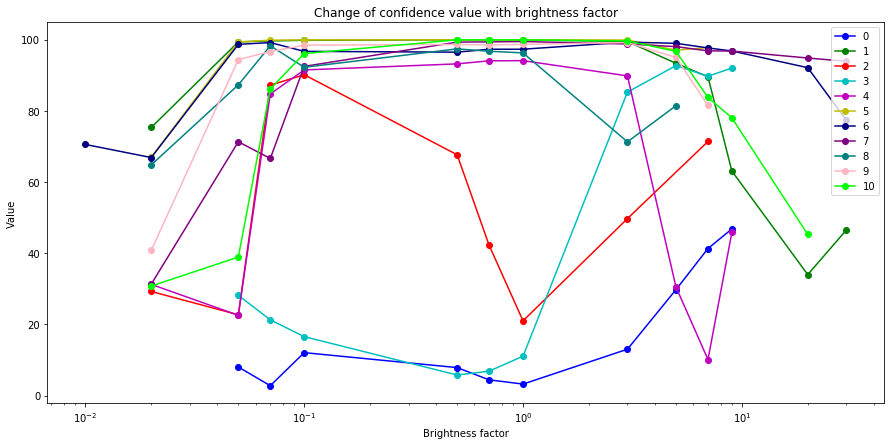

In [30]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in listof:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

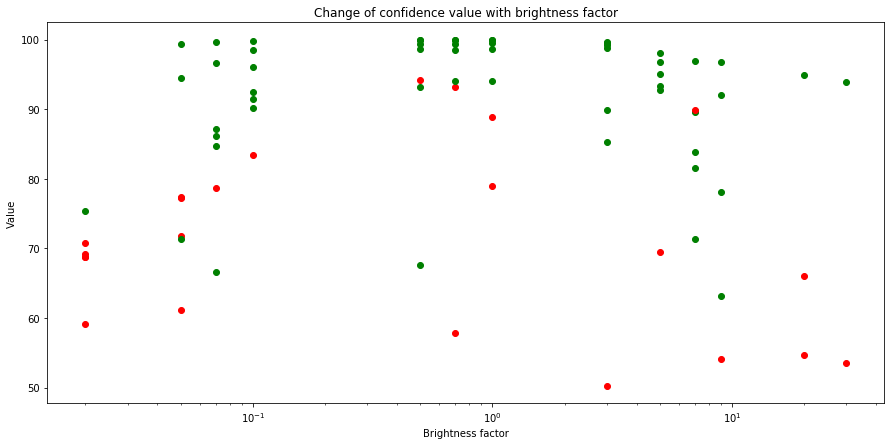

In [266]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']

fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list3:
    
    for x,y in d.items():
        if y[0]=='0':
            plt.plot(x,y[1],color ='green',marker='o')
            
            
        else: 
            plt.plot(x,y[1],color ='r',marker='o')
  
    
       
#plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

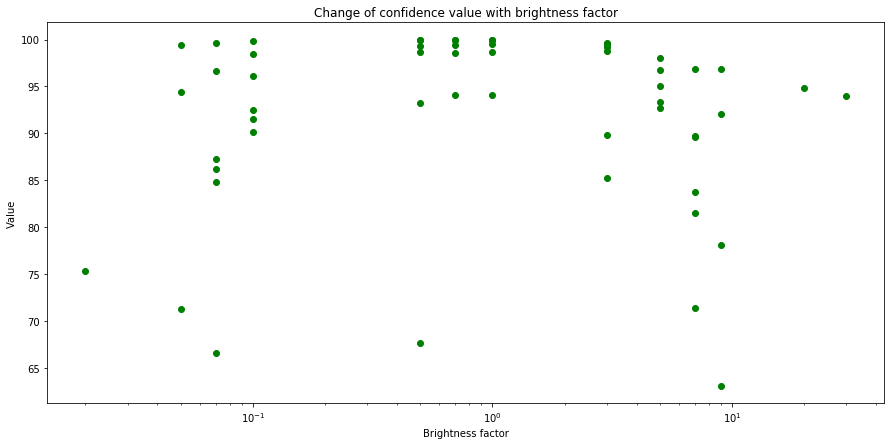

In [267]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']

fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list3:
    
    for x,y in d.items():
        if y[0]=='0':
            plt.plot(x,y[1],color ='green',marker='o')
            
            
    
       
#plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

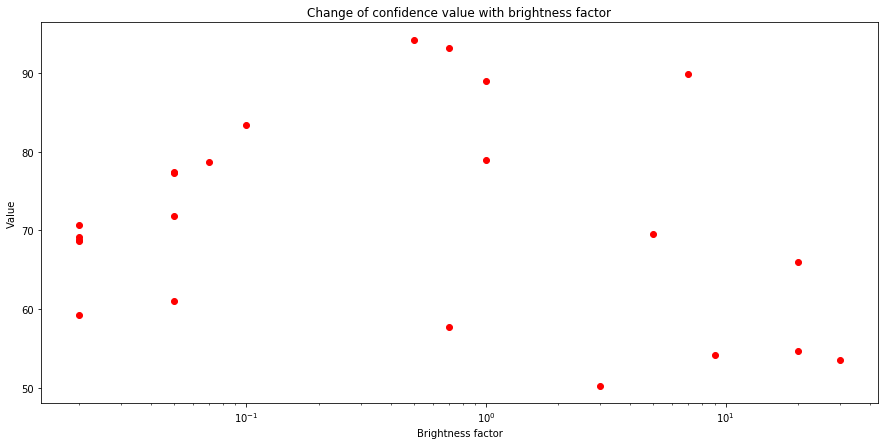

In [268]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']

fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list3:
    
    for x,y in d.items():
        if y[0]=='1':

            plt.plot(x,y[1],color ='r',marker='o')
  
    
       
#plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

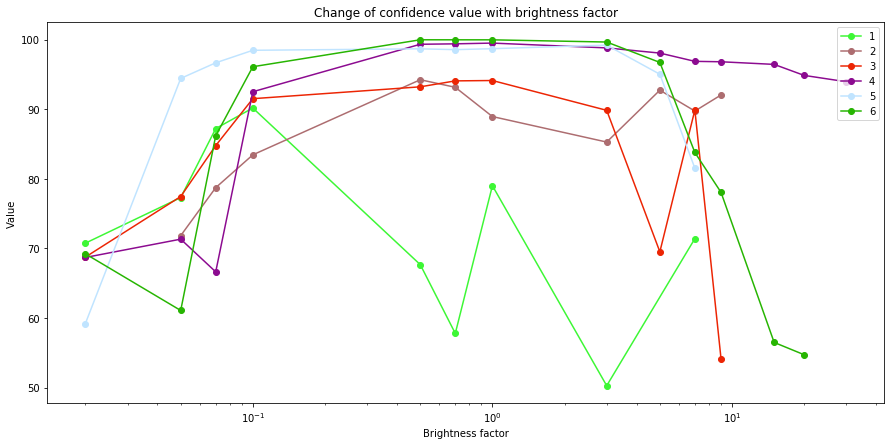

In [183]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with brightness factor")
for d in list3:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y[1])
            
        
    plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [6]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listof2=[]
listfs=[]
listms=[]
j=-1
cor=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist)
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        listof2.append(en)
        i=-1
        j=j+1
        print(genlist[j])
        enhancer = ImageEnhance.Sharpness(im)
        dict={}
        numbers=[0.05,0.1,0.5,1.0,5.0,9.0,20.0,30.0,40,60,80,100,200,300]
        for x in numbers:
            l1=[]
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change.png')
            with open('dataset/change.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                for key,value in response.items():
                    if key=='FaceDetails':
                        for k in value:
                            for ke,val in k.items():
                                if ke=='Gender':
                                            for key1,val1 in val.items():
                                                if key1=='Value':
                                                    if val1==genlist[j]:
                                                        l1.append('0')
                                                    else:
                                                        l1.append('1')
                                                else:
                                                    l1.append(val1)
                                                    dict[numbers[i]]=l1
                
                 
        if genlist[j]=='Female':
            listfs.append(en)
            listfs.append(dict)
        else:
            listms.append(en)
            listms.append(dict)                                        
        listof2.append(dict)

['Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male']
Male
Male
Male
Female
Female


InvalidImageFormatException: An error occurred (InvalidImageFormatException) when calling the DetectFaces operation: Request has invalid image format

In [33]:
i=0
listsegs1=[]
listsegs2=[]
listsegs3=[]
for one in listof2:
    if i<11:
        listsegs1.append(one)
    if i<22:
        listsegs2.append(one)
    else:
        listsegs2.append(one)
    i=i+1


In [35]:
from collections.abc import Mapping

name=""
for each in listfs:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

In [36]:
for each in listfs:
    print(each)

chf1.jpg
{0.05: ['0', 99.4565658569336], 0.1: ['0', 99.46512603759766], 0.5: ['0', 99.44522094726562], 1.0: ['0', 99.31173706054688], 5.0: ['0', 98.77903747558594], 9.0: ['0', 96.9483871459961], 20.0: ['0', 84.14771270751953], 30.0: ['1', 41.33026123046875], 40: ['1', 13.602157592773438], 60: ['1', 30.928573608398438], 80: ['1', 13.740791320800781], 100: ['1', 15.303810119628906], 200: ['1', 11.738075256347656], 300: ['1', 44.75461196899414, '1', 71.80294036865234]}
chf2.jpg
{0.05: ['0', 99.62886047363281], 0.1: ['0', 99.6284408569336], 0.5: ['0', 99.64923858642578], 1.0: ['0', 99.67023468017578], 5.0: ['0', 99.63023376464844], 9.0: ['0', 99.55284881591797], 20.0: ['0', 99.2274398803711], 30.0: ['0', 98.73991394042969], 40: ['0', 96.7623062133789], 60: ['0', 73.11771392822266], 80: ['0', 57.857791900634766], 100: ['0', 52.25375747680664], 200: ['0', 50.51887130737305], 300: ['0', 56.33018112182617]}
chf3.jpg
{0.05: ['0', 96.84530639648438], 0.1: ['0', 96.81597137451172], 0.5: ['0', 97.

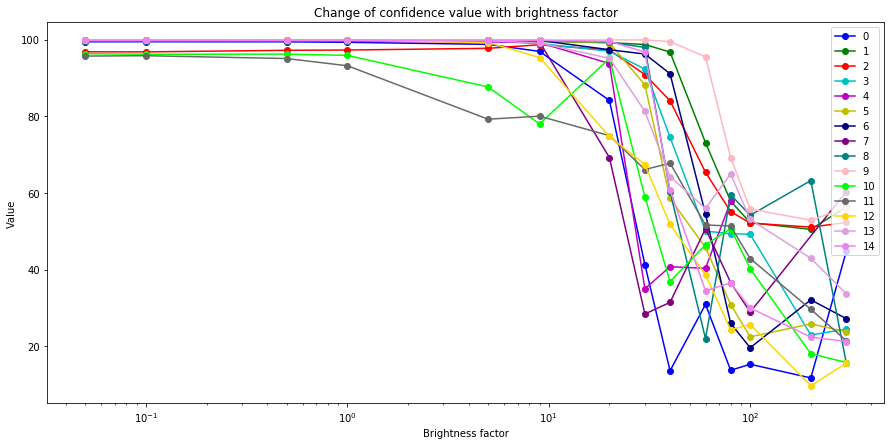

In [37]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor(Female)")
for d in listfs:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [38]:
from collections.abc import Mapping

name=""
for each in listms:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

In [39]:
for each in listms:
    print(each)

adience1.jpg
{0.05: ['1', 4.921272277832031], 0.1: ['1', 4.187568664550781, '1', 96.13656616210938], 0.5: ['1', 2.9412689208984375], 1.0: ['1', 6.811286926269531, '1', 95.48723602294922], 5.0: ['1', 4.3789825439453125, '1', 91.85887908935547], 9.0: ['1', 36.515289306640625, '1', 65.3641586303711], 20.0: ['0', 82.97065734863281, '0', 82.74851989746094], 30.0: ['0', 70.77912139892578], 40: ['1', 44.45087814331055], 60: ['1', 38.726295471191406, '1', 59.03242874145508], 80: ['1', 38.93564987182617, '1', 57.00560760498047, '1', 57.606143951416016], 100: ['1', 46.36473846435547, '1', 51.705718994140625, '1', 59.12571716308594, '1', 58.88274383544922], 200: ['0', 55.53575897216797, '1', 58.30590057373047], 300: ['0', 53.4846076965332, '1', 51.12736892700195]}
boy1.jpg
{0.05: ['1', 22.873184204101562], 0.1: ['1', 24.186386108398438], 0.5: ['1', 26.586807250976562], 1.0: ['1', 20.98992156982422], 5.0: ['1', 19.252708435058594], 9.0: ['1', 38.37510299682617], 20.0: ['1', 43.81980895996094], 30.

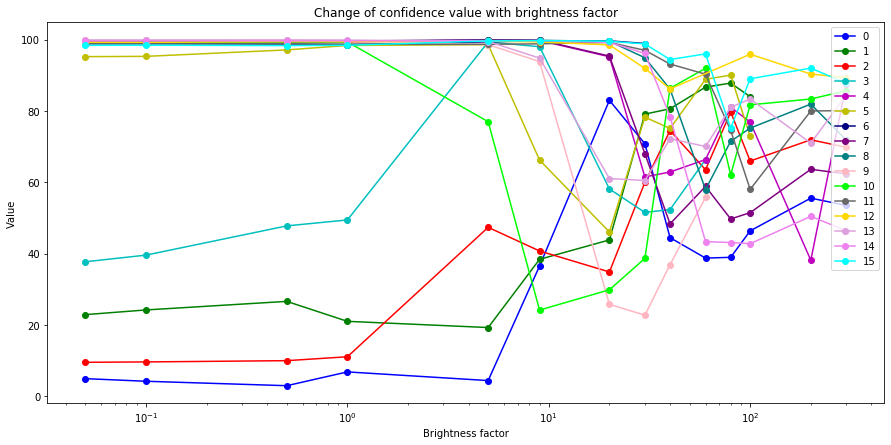

In [40]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Brightness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in listms:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [ ]:
i=0
for each in listof2:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            for v in vall:
                if v=='1':
                    if flag==0:
                        flag=2
                    if flag==2:
                        flag=2;

In [220]:
ls3=[]
flag=0
categorys1=[]
categorys2=[]
categorys3=[]
i=0
for each in listof2:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            for v in vall:
                if v=='1':
                    if flag==0:
                        flag=2
                    if flag==2:
                        flag=2;
                    else:
                        flag=3
                if v=='0':
                    if flag==0:
                        flag=1
                    if flag==1:
                        flag=1
                    else:
                        flag=3

        if flag==1:
            categorys1.append(name)
            categorys1.append(each)
        if flag==2:
            categorys2.append(name)
            categorys2.append(each)
        if flag==3:
            categorys3.append(name)
            categorys3.append(each)
    else:
        name=each
print("\nCategory1:")    
print(categorys1)
print("\nCategory2:")    
print(categorys2)
print("\nCategory3:")    
print(categorys3)





Category1:
['japan1.jpg', {0.05: ['0', 93.6557388305664], 0.1: ['0', 93.6557388305664], 0.5: ['0', 93.846923828125], 1.0: ['0', 94.1226806640625], 5.0: ['0', 95.46418762207031], 9.0: ['0', 97.36473846435547], 20.0: ['0', 98.65658569335938], 30.0: ['0', 95.60904693603516], 40: ['0', 91.69015502929688], 60: ['0', 90.51057434082031], 80: ['0', 64.35472106933594], 100: ['0', 66.33340454101562], 200: ['0', 72.50293731689453], 300: ['0', 65.23139190673828]}, 'messi.jpg', {0.05: ['0', 99.55127716064453], 0.1: ['0', 99.5362548828125], 0.5: ['0', 99.5550537109375], 1.0: ['0', 99.50020599365234], 5.0: ['0', 93.94495391845703], 9.0: ['0', 95.62017822265625], 20.0: ['0', 63.09420394897461], 30.0: ['0', 62.35050582885742], 40: ['0', 56.60089111328125], 60: ['0', 61.31183624267578], 80: ['0', 76.78302001953125], 100: ['0', 55.472900390625]}, 'ryan.jpg', {0.05: ['0', 98.727783203125], 0.1: ['0', 98.72402954101562], 0.5: ['0', 98.69712829589844], 1.0: ['0', 98.697265625], 5.0: ['0', 98.68258666992188

In [221]:
cat2sdict={}
lists2=[]
ll1=[]
for cat2 in categorys2:
    if isinstance(cat2, Mapping):
        cat2sdict={}
        for keycat2,valcat2 in cat2.items():
            for vals in valcat2:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat2sdict[keycat2]=vals
        lists2.append(cat2sdict)
print(lists2)

[]


No handles with labels found to put in legend.


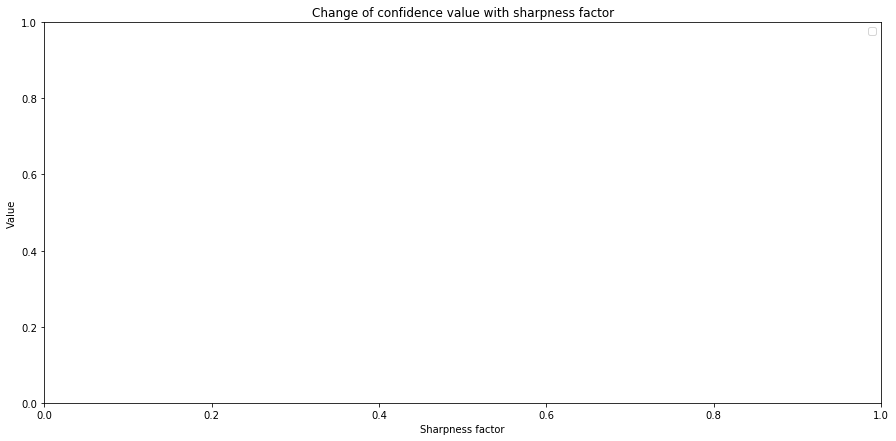

In [222]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in lists2:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")       
plt.show()

In [223]:
cat1sdict={}
lists1=[]
ll1=[]
for cat1 in categorys1:
    if isinstance(cat1, Mapping):
        cat1sdict={}
        for keycat1,valcat1 in cat1.items():
            for vals in valcat1:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat1sdict[keycat1]=vals
        lists1.append(cat1sdict)
print(lists1)

[{0.05: 93.6557388305664, 0.1: 93.6557388305664, 0.5: 93.846923828125, 1.0: 94.1226806640625, 5.0: 95.46418762207031, 9.0: 97.36473846435547, 20.0: 98.65658569335938, 30.0: 95.60904693603516, 40: 91.69015502929688, 60: 90.51057434082031, 80: 64.35472106933594, 100: 66.33340454101562, 200: 72.50293731689453, 300: 65.23139190673828}, {0.05: 99.55127716064453, 0.1: 99.5362548828125, 0.5: 99.5550537109375, 1.0: 99.50020599365234, 5.0: 93.94495391845703, 9.0: 95.62017822265625, 20.0: 63.09420394897461, 30.0: 62.35050582885742, 40: 56.60089111328125, 60: 61.31183624267578, 80: 76.78302001953125, 100: 55.472900390625}, {0.05: 98.727783203125, 0.1: 98.72402954101562, 0.5: 98.69712829589844, 1.0: 98.697265625, 5.0: 98.68258666992188, 9.0: 98.74658966064453, 20.0: 99.52330017089844, 30.0: 99.5693588256836, 40: 98.44610595703125, 60: 99.38042449951172, 80: 88.73774719238281, 100: 74.46533966064453, 200: 61.681739807128906, 300: 56.52322769165039}]


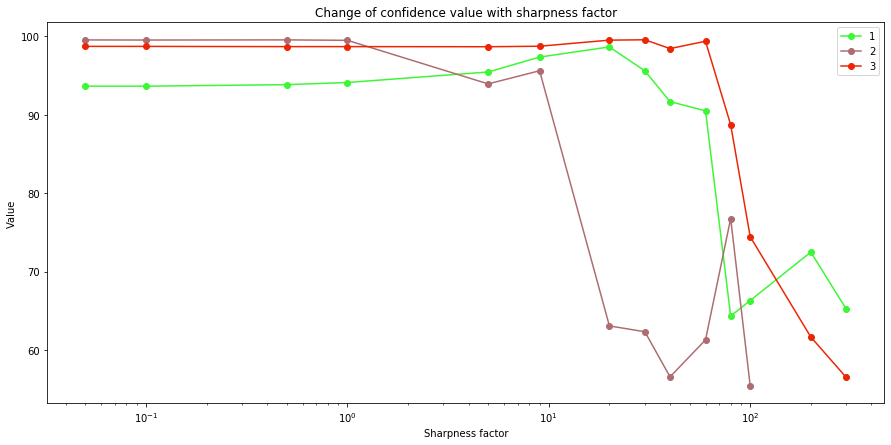

In [224]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in lists1:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")  
plt.xscale('log')
plt.show()

In [225]:
cat3dict={}
lists3=[]
ll1=[]
for cat3 in categorys3:
    if isinstance(cat3, Mapping):
        lists3.append(cat3)
for l in lists3:
    print(l)

{0.05: ['1', 95.07872772216797], 0.1: ['1', 95.81243133544922, '1', 96.13656616210938], 0.5: ['1', 95.6955337524414, '1', 95.55367279052734], 1.0: ['1', 93.18871307373047, '1', 95.48723602294922], 5.0: ['1', 95.62101745605469, '1', 91.85887908935547], 9.0: ['1', 92.96772003173828], 20.0: ['0', 86.9726791381836], 30.0: ['0', 74.0754165649414], 40: ['1', 55.54912185668945], 60: ['1', 61.273704528808594, '1', 59.03242874145508], 80: ['1', 61.06435012817383, '1', 57.00560760498047, '1', 57.606143951416016], 100: ['1', 53.63526153564453, '1', 51.705718994140625, '1', 59.12571716308594, '1', 58.88274383544922], 200: ['0', 55.53575897216797, '1', 58.30590057373047], 300: ['0', 53.4846076965332, '1', 51.12736892700195]}
{0.05: ['0', 99.95527648925781], 0.1: ['0', 99.95726013183594], 0.5: ['0', 99.9686279296875], 1.0: ['0', 99.97807312011719], 5.0: ['0', 99.90895080566406], 9.0: ['1', 91.29573822021484, '0', 52.178829193115234, '0', 98.2693099975586], 20.0: ['0', 85.06791687011719], 30.0: ['1',

In [ ]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in lists3:
    i=i+1
    
    for x,y in d.items():
        if y[0]=='0':
            plt.plot(x,y[1],color ='green',marker='o')
            
          
       
   
plt.xscale("log")
plt.show()

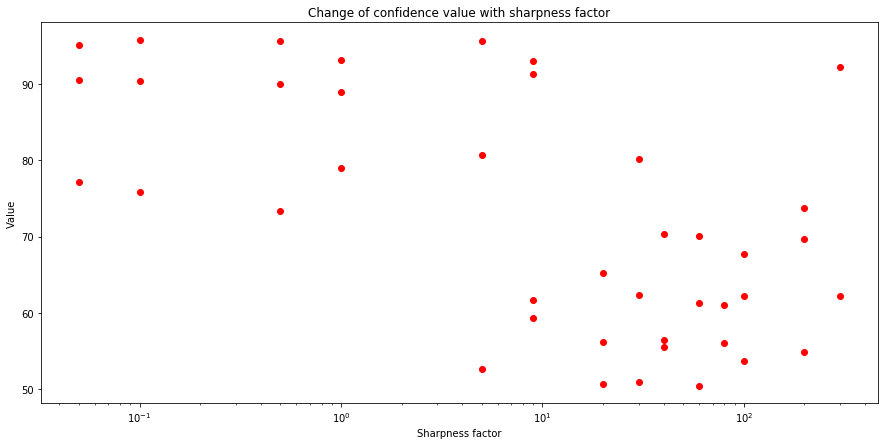

In [227]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in lists3:
    i=i+1
    
    for x,y in d.items():
        if y[0]=='1':
            plt.plot(x,y[1],color ='r',marker='o')
            
          
       
   
plt.xscale("log")
plt.show()

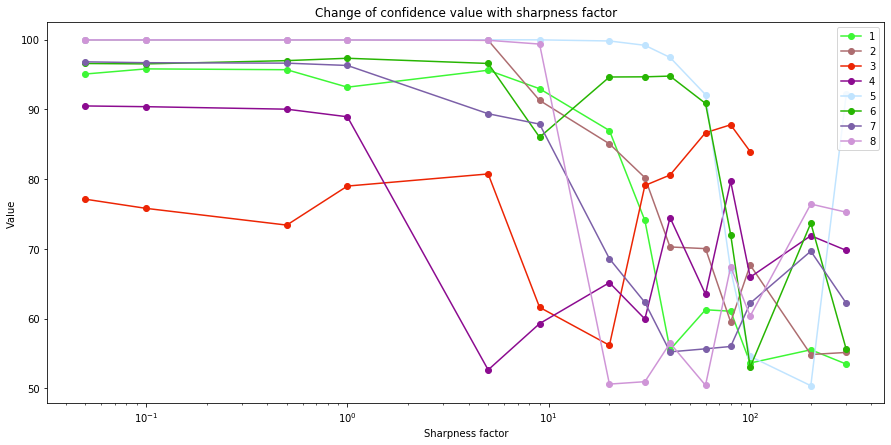

In [230]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in lists3:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y[1])
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")
plt.xscale('log')
plt.show()

In [5]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listof3=[]
listmc=[]
listfc=[]
y=-1
cor=-1
j=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)

for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        im = Image.open(z)
        listof3.append(en)
        j=j+1
        print(genlist[j])
        i=-1
        enhancer = ImageEnhance.Contrast(im)
        dict={}
        numbers=[0.5,1.0,1.5,2.0,4.0,8.0,10,20,40,60,80,100,200,300]
        for x in numbers:
            l1=[]
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change2.png')
            with open('dataset/change2.png', "rb") as source_image:
                image=source_image.read()
                response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
              
                value=response.get("FaceDetails")
                
                if value:
                    v=value[0]
                   
                    k=v.get('Gender')
                    if k['Value']==genlist[j]:
                        l1.append('0')
                    else:

                        l1.append('1')
                
                    l1.append(k['Confidence'])
                    dict[numbers[i]]=l1
                
        if genlist[j]=='Female':
            listfc.append(en)
            listfc.append(dict)
        else:
            listmc.append(en)
            listmc.append(dict)                                        
                                                
        listof3.append(dict)


Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Female
Female
Female
Male
Male
Male
Female
Female
Female
Male
Male
Male


In [6]:
for each in listof3:
    print(each)

adience1.jpg
{0.5: ['1', 94.40454864501953], 1.0: ['1', 93.18871307373047], 1.5: ['1', 96.7161865234375], 2.0: ['1', 95.54528045654297], 4.0: ['1', 86.07300567626953], 8.0: ['1', 64.19695281982422], 10: ['1', 69.60930633544922], 20: ['1', 73.39228057861328], 40: ['1', 80.45819091796875], 60: ['1', 91.96125030517578], 80: ['1', 91.22441101074219], 100: ['1', 90.62784576416016], 200: ['1', 91.00985717773438], 300: ['1', 91.00985717773438]}
boy1.jpg
{0.5: ['0', 98.07539367675781], 1.0: ['1', 79.01007843017578], 1.5: ['1', 97.86468505859375], 2.0: ['1', 99.60386657714844], 4.0: ['1', 99.13301849365234], 8.0: ['1', 93.84419250488281], 10: ['1', 89.64946746826172], 20: ['1', 67.16148376464844], 40: ['1', 60.120140075683594], 60: ['1', 52.319175720214844], 80: ['0', 63.59135055541992], 100: ['1', 54.3690185546875], 200: ['0', 55.73543167114258], 300: ['0', 55.73543167114258]}
boy2b1.0.jpg
{0.5: ['1', 91.9534912109375], 1.0: ['1', 88.94523620605469], 1.5: ['1', 82.91163635253906], 2.0: ['1', 9

In [7]:
for each in listfc:
    print(each)

chf1.jpg
{0.5: ['0', 99.1020736694336], 1.0: ['0', 99.31173706054688], 1.5: ['0', 99.47735595703125], 2.0: ['0', 99.61813354492188], 4.0: ['0', 99.18354797363281], 8.0: ['0', 93.10892486572266], 10: ['0', 88.47833251953125], 20: ['0', 88.9595947265625], 40: ['0', 82.59712219238281], 60: ['0', 81.38851165771484], 80: ['0', 80.63005065917969], 100: ['0', 81.99069213867188], 200: ['0', 80.65692901611328], 300: ['0', 80.65692901611328]}
chf2.jpg
{0.5: ['0', 99.5003433227539], 1.0: ['0', 99.67023468017578], 1.5: ['0', 99.57988739013672], 2.0: ['0', 99.7038345336914], 4.0: ['0', 99.8821029663086], 8.0: ['0', 99.8143081665039], 10: ['0', 99.81088256835938], 20: ['0', 99.6158676147461], 40: ['0', 99.4501724243164], 60: ['0', 99.42415618896484], 80: ['0', 99.42483520507812], 100: ['0', 99.46867370605469], 200: ['0', 99.41422271728516], 300: ['0', 99.41422271728516]}
chf3.jpg
{0.5: ['0', 98.71106719970703], 1.0: ['0', 97.29955291748047], 1.5: ['0', 95.34272003173828], 2.0: ['0', 96.6257171630859

In [8]:
from collections.abc import Mapping

name=""
for each in listfc:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

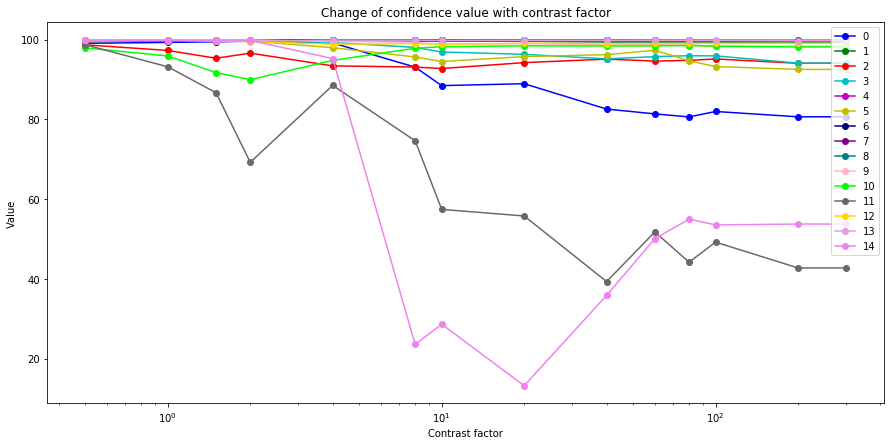

In [10]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
#color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listfc:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [11]:
from collections.abc import Mapping

name=""
for each in listmc:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            if vall[0]=='1':
                vall[1]=100-vall[1]

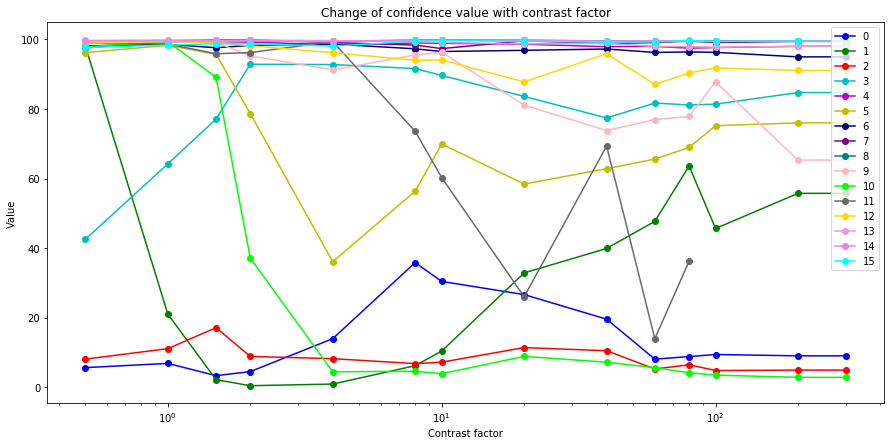

In [13]:
color=['b','g','r','c','m','y','navy','purple','teal','lightpink','lime','dimgray','gold','plum','violet','aqua']
i=-1
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listmc:
    
    if isinstance(d, Mapping):
        
        l1=[]
        l2=[]
        for x,y in d.items():
            l1.append(x)
            l2.append(y[1])

        i=i+1
        plt.plot(l1,l2,color =color[i],marker='o',label=i)
        
       
plt.legend(loc="upper right")   
plt.xscale("log")
plt.show()

In [243]:
for sharp in listof3:
    print(sharp)

adience1.jpg
{0.5: ['1', 93.83660888671875, '1', 94.59608459472656], 1.0: ['1', 93.18871307373047, '1', 95.48723602294922], 1.5: ['1', 97.46705627441406], 2.0: ['1', 95.54528045654297], 4.0: ['1', 86.07300567626953], 8.0: ['1', 64.19695281982422], 10: ['1', 69.60930633544922], 20: ['1', 73.39228057861328], 40: ['1', 80.45819091796875], 60: ['1', 91.96125030517578], 80: ['1', 91.22441101074219], 100: ['1', 90.62784576416016], 200: ['1', 91.00985717773438], 300: ['1', 91.00985717773438], 400: ['1', 91.00985717773438]}
blake.jpg
{0.5: ['0', 99.92969512939453], 1.0: ['0', 99.97807312011719], 1.5: ['0', 99.98133850097656], 2.0: ['0', 99.98246765136719], 4.0: ['0', 99.88717651367188], 8.0: ['0', 99.78453063964844], 10: ['0', 99.71287536621094], 20: ['0', 99.63395690917969], 40: ['0', 99.37555694580078], 60: ['0', 99.30061340332031], 80: ['0', 99.23219299316406], 100: ['0', 99.25912475585938], 200: ['0', 99.2129898071289], 300: ['0', 99.2129898071289], 400: ['0', 99.2129898071289]}
boy1.jpg
{

In [245]:
lsh3=[]
flag=0
categorysh1=[]
categorysh2=[]
categorysh3=[]
for each in listof3:
    if isinstance(each, Mapping):
        flag=0
        for keyl,vall in each.items():
            for v in vall:
                if v=='1':
                    if flag==0:
                        flag=2
                    if flag==2:
                        flag=2;
                    else:
                        flag=3
                if v=='0':
                    if flag==0:
                        flag=1
                    if flag==1:
                        flag=1
                    else:
                        flag=3

        if flag==1:
            categorysh1.append(name)
            categorysh1.append(each)
        if flag==2:
            categorysh2.append(name)
            categorysh2.append(each)
        if flag==3:
            categorysh3.append(name)
            categorysh3.append(each)
    else:
        name=each
print("Category1:\n")    
print(categorysh1)
print("Category2:\n")    
print(categorysh2)
print("Category3:\n")    
print(categorysh3)



Category1:

['blake.jpg', {0.5: ['0', 99.92969512939453], 1.0: ['0', 99.97807312011719], 1.5: ['0', 99.98133850097656], 2.0: ['0', 99.98246765136719], 4.0: ['0', 99.88717651367188], 8.0: ['0', 99.78453063964844], 10: ['0', 99.71287536621094], 20: ['0', 99.63395690917969], 40: ['0', 99.37555694580078], 60: ['0', 99.30061340332031], 80: ['0', 99.23219299316406], 100: ['0', 99.25912475585938], 200: ['0', 99.2129898071289], 300: ['0', 99.2129898071289], 400: ['0', 99.2129898071289]}, 'kenyafemale.jpg', {0.5: ['0', 99.9857406616211], 1.0: ['0', 99.98619842529297], 1.5: ['0', 99.971923828125], 2.0: ['0', 99.94415283203125], 4.0: ['0', 99.84486389160156], 8.0: ['0', 99.52033996582031], 10: ['0', 99.74181365966797], 20: ['0', 99.82440948486328], 40: ['0', 99.766357421875], 60: ['0', 99.75098419189453], 80: ['0', 99.77255249023438], 100: ['0', 99.88418579101562], 200: ['0', 99.80696105957031], 300: ['0', 99.80696105957031], 400: ['0', 99.80696105957031]}, 'koreanf.jpg', {0.5: ['0', 98.246292114

In [246]:
cat1shdict={}
listsh1=[]
ll1=[]
for cat2 in categorysh1:
    if isinstance(cat2, Mapping):
        cat1shdict={}
        for keycat2,valcat2 in cat2.items():
            for vals in valcat2:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat1shdict[keycat2]=vals
        listsh1.append(cat1shdict)
print(listsh1)

[{0.5: 99.92969512939453, 1.0: 99.97807312011719, 1.5: 99.98133850097656, 2.0: 99.98246765136719, 4.0: 99.88717651367188, 8.0: 99.78453063964844, 10: 99.71287536621094, 20: 99.63395690917969, 40: 99.37555694580078, 60: 99.30061340332031, 80: 99.23219299316406, 100: 99.25912475585938, 200: 99.2129898071289, 300: 99.2129898071289, 400: 99.2129898071289}, {0.5: 99.9857406616211, 1.0: 99.98619842529297, 1.5: 99.971923828125, 2.0: 99.94415283203125, 4.0: 99.84486389160156, 8.0: 99.52033996582031, 10: 99.74181365966797, 20: 99.82440948486328, 40: 99.766357421875, 60: 99.75098419189453, 80: 99.77255249023438, 100: 99.88418579101562, 200: 99.80696105957031, 300: 99.80696105957031, 400: 99.80696105957031}, {0.5: 98.24629211425781, 1.0: 97.33777618408203, 1.5: 96.21947479248047, 2.0: 97.1795425415039, 4.0: 99.68940734863281, 8.0: 99.88501739501953, 10: 99.89069366455078, 20: 99.94075012207031, 40: 99.95726013183594, 60: 99.96178436279297, 80: 99.9652099609375, 100: 99.96674346923828, 200: 99.973

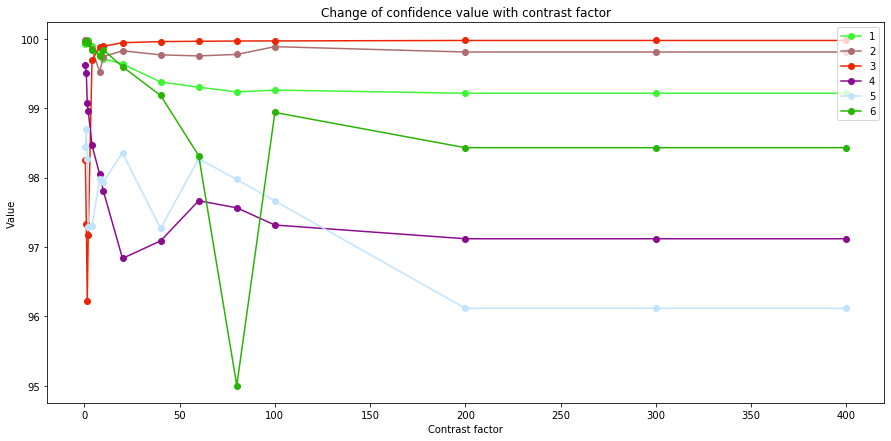

In [247]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listsh1:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")       
plt.show()

In [248]:
cat2shdict={}
listsh2=[]
ll1=[]
for cat2 in categorysh2:
    if isinstance(cat2, Mapping):
        cat2shdict={}
        for keycat2,valcat2 in cat2.items():
            for vals in valcat2:
                if vals=='0':
                    ll1.append(vals)
                if vals=='1':
                    ll1.append(vals)
                else:
                    cat2shdict[keycat2]=vals
        listsh2.append(cat2shdict)
print(listsh2)

[{0.5: 94.59608459472656, 1.0: 95.48723602294922, 1.5: 97.46705627441406, 2.0: 95.54528045654297, 4.0: 86.07300567626953, 8.0: 64.19695281982422, 10: 69.60930633544922, 20: 73.39228057861328, 40: 80.45819091796875, 60: 91.96125030517578, 80: 91.22441101074219, 100: 90.62784576416016, 200: 91.00985717773438, 300: 91.00985717773438, 400: 91.00985717773438}, {0.5: 91.9534912109375, 1.0: 88.94523620605469, 1.5: 82.91163635253906, 2.0: 91.17737579345703, 4.0: 91.82642364501953, 8.0: 93.24495697021484, 10: 92.83756256103516, 20: 88.63834381103516, 40: 89.54304504394531, 60: 94.79293823242188, 80: 93.58584594726562, 100: 95.23355865478516, 200: 95.11441040039062, 300: 95.11441040039062, 400: 95.11441040039062}]


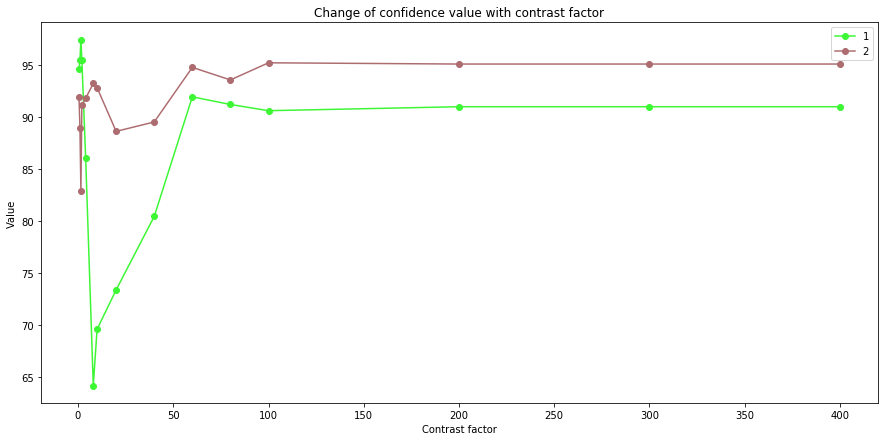

In [249]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listsh2:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y)
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")       
plt.show()

In [250]:
cat3dict={}
listsh3=[]
ll1=[]
for cat3 in categorysh3:
    if isinstance(cat3, Mapping):
        listsh3.append(cat3)
for l in listsh3:
    print(l)

{0.5: ['0', 98.07539367675781], 1.0: ['1', 79.01007843017578], 1.5: ['1', 97.86468505859375], 2.0: ['1', 99.60386657714844], 4.0: ['1', 99.13301849365234], 8.0: ['1', 93.84419250488281], 10: ['1', 89.64946746826172], 20: ['1', 67.16148376464844], 40: ['1', 60.120140075683594], 60: ['1', 52.319175720214844], 80: ['0', 63.59135055541992], 100: ['1', 54.3690185546875], 200: ['0', 55.73543167114258], 300: ['0', 55.73543167114258], 400: ['0', 55.73543167114258]}
{0.5: ['0', 95.49026489257812], 1.0: ['0', 94.1226806640625], 1.5: ['0', 88.34518432617188], 2.0: ['0', 86.28680419921875], 4.0: ['0', 74.09255981445312], 8.0: ['1', 52.54591751098633], 10: ['1', 53.242069244384766], 20: ['1', 59.40937423706055], 40: ['1', 63.75634765625], 60: ['1', 68.16873168945312], 80: ['1', 57.5345573425293], 100: ['1', 61.56111526489258], 200: ['1', 68.56527709960938], 300: ['1', 68.56527709960938], 400: ['1', 68.56527709960938]}
{0.5: ['0', 97.05577087402344], 1.0: ['0', 96.30369567871094], 1.5: ['0', 61.6901

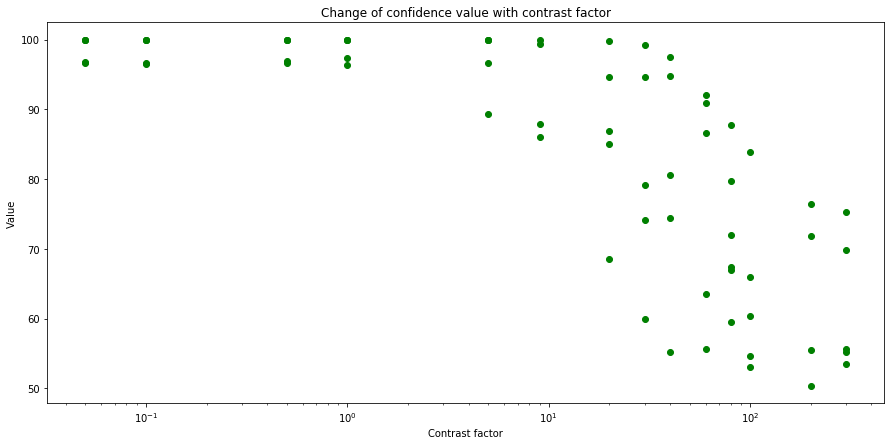

In [254]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in lists3:
    i=i+1
    
    for x,y in d.items():
        if y[0]=='0':
            plt.plot(x,y[1],color ='green',marker='o')
            
          
       
   
plt.xscale("log")
plt.show()

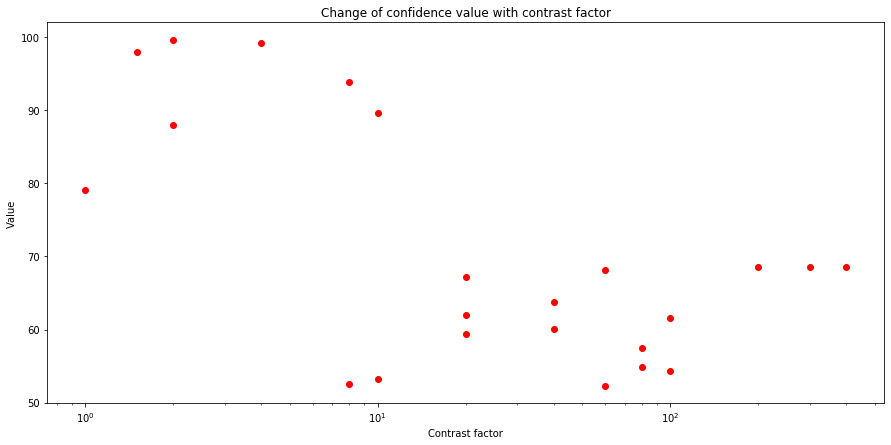

In [253]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
temp=0
val=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Contrast factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with contrast factor")
for d in listsh3:
    i=i+1
    
    for x,y in d.items():
        if y[0]=='1':
            plt.plot(x,y[1],color ='r',marker='o')
            
          
       
   
plt.xscale("log")
plt.show()

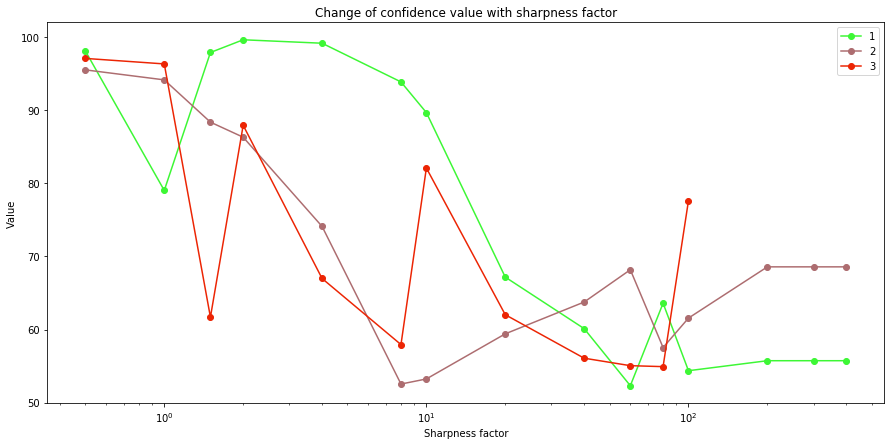

In [252]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,1,1,1])
color=['#37AB65', '#3DF735', '#AD6D70', '#EC2504', '#8C0B90', '#C0E4FF', '#27B502', '#7C60A8', '#CF95D7', '#145JKH']
i=0
fig = plt.figure(figsize = (15, 7))
plt.xlabel("Sharpness factor")
plt.ylabel("Value") 
plt.title("Change of confidence value with sharpness factor")
for d in listsh3:
    i=i+1
    l1=[]
    l2=[]
    for x,y in d.items():
        l1.append(x)
        l2.append(y[1])
    plt.plot(l1, l2, color =color[i],marker='o',label=i)
plt.legend(loc="upper right")
plt.xscale('log')
plt.show()

In [ ]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listofbrights=[]
listfsh=[]
listmsh=[]
y=-1
j=-1
cor=-1
genlist=[]
with open("verify.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist[0])
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        #im = Image.open(z)
        j=j+1
        i=-1
        listofbrights.append(en)
        listofbris=[]
        #enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers1=[0.025,0.05,0.25,0.5,1.0,3.0,4.0,5.0,7.0,10,20.0,30]
        numbers2=[0.5,1.0,1.5,2.0,4.0,7.0,10,20.0,40,60,80,100,200,300]
        for x in numbers1:
            im = Image.open(z)
            enhancer = ImageEnhance.Brightness(im)
            i=i+1
            
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change1.png')
           
            for y in numbers2:
                dict={}
                l1=[]
                factorset=[]
                factorset.append(x)
                factorset.append(y)
                tup1=tuple(factorset)
                
                im = Image.open('dataset/change1.png')
                enhancer = ImageEnhance.Sharpness(im)
                im_output = enhancer.enhance(y)
                im_output.save('dataset/gaus1.png')
                with open('dataset/gaus1.png', "rb") as source_image:
                    image=source_image.read()
                    response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                    
                    for key,value in response.items():
                        if key=='FaceDetails':
                            for k in value:
                                for ke,val in k.items():
                                    if ke=='Gender':
                                        for key1,val1 in val.items():
                                            if key1=='Value':
                                                if val1==genlist[0]:
                                                    l1.append('0')
                                                else:
                                                    l1.append('1')
                                                    
                                            else:
                                                l1.append(val1)
                                                
                                                dict[tup1]=l1
                                                print(dict)
                
                                                
                listofbris.append(dict)
        if genlist[j]=='Female':
            listfsh.append(en)
            listfsh.append(dict)
        else:
            listmsh.append(en)
            listmsh.append(dict)                                        
        
        listofbrights.append(listofbris)
                            
                                                
       

In [ ]:
print(listofbrights)

In [ ]:
for li in listofbrights:
    for dictionkey,dictionvalue in li.items():
        

AttributeError: 'str' object has no attribute 'items'

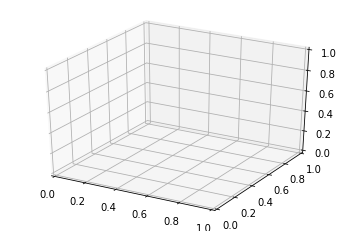

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
l1=[]
l2=[]
l3=[]
ax = plt.axes(projection='3d')
for li in listofbrights:
    for dictionkey,dictionval in li.items():
        l1.append(dictionkey[0])
        l2.append(dictionkey[1])
        l3.append(dictionval[1])
    
ax.scatter3D(l1, l2, l3, 'gray')
ax.view_init(60, 35)

In [ ]:
from PIL import Image, ImageEnhance
basepath = 'C:/Users/sshar/testingbias/dataset/'
import csv
listofbrightc=[]
y=-1
cor=-1
genlist=[]
with open("gender.csv","r") as input:
    next(input)
    reader=csv.reader(input)
    for line in reader:
        gen=line[0]
        genlist.append(gen)
print(genlist[0])
for en in os.listdir(basepath):
    x = re.search(".*jpg", en)
    if(x):
        #y=os.path.join(basepath,entry)
        z=os.path.join(basepath,en)
        #im = Image.open(z)
        i=-1
        listofbris=[]
        #enhancer = ImageEnhance.Brightness(im)
        dict={}
        numbers1=[0.0,0.025,0.05,0.25,0.5,1.0,3.0,4.0,5.0,9.0,11.0,20.0,30.0,40]
        numbers2=[0.0,0.5,1.0,1.5,2.0,4.0,7.0,10,20.0,40,60,80,100,200,300,400]
        for x in numbers1:
            im = Image.open(z)
            enhancer = ImageEnhance.Brightness(im)
            i=i+1
            im_output = enhancer.enhance(x)
            im_output.save('dataset/change.png')
           
            for y in numbers2:
                dict={}
                l1=[]
                factorset=[]
                factorset.append(x)
                factorset.append(y)
                tup1=tuple(factorset)
                
                im = Image.open('dataset/change.png')
                enhancer = ImageEnhance.Contrast(im)
                im_output = enhancer.enhance(y)
                im_output.save('dataset/gaus.png')
                with open('dataset/gaus.png', "rb") as source_image:
                    image=source_image.read()
                    response=client.detect_faces(Image={'Bytes':image}, Attributes=['ALL'])
                    
                    for key,value in response.items():
                        if key=='FaceDetails':
                            for k in value:
                                for ke,val in k.items():
                                    if ke=='Gender':
                                        for key1,val1 in val.items():
                                            if key1=='Value':
                                                if val1==genlist[0]:
                                                    l1.append('0')
                                                else:
                                                    l1.append('1')
                                                    
                                            else:
                                                l1.append(val1)
                                                
                                                dict[tup1]=l1
                                                print(dict)
                
                                                
                listofbris.append(dict)
        listofbrightc.append(listofbris)
                            
                    